# Comparison of different Classification Algorithms



In [41]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from main import aggregate_data, normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
importer = TestDataImporter('data/testset.csv')
y_train = np.array(importer.trainset.classification)
y_test = np.array(importer.testset.classification)

In [5]:
metrics = np.array(list(metricCollection.keys()))
metrics

array(['open_issue_count', 'forks_count', 'avg_entropy',
       'file_folder_ratio', 'avg_folder_depth', 'file_count',
       'up_to_dateness', 'watcher_count', 'html_count', 'is_io_page',
       'repo_size'], 
      dtype='<U17')

In [6]:
data_train = aggregate_data(importer.trainset.repos)
data_train = data_train[metrics]
data_train = normalize_data(data_train)
data_train[:5]

,avg_entropy,forks_count,file_folder_ratio,avg_folder_depth,file_count,up_to_dateness,watcher_count,html_count,is_io_page,repo_size
0,0.251590,0.566949,0.330773,0.253733,0.405086,0.026821,0.770764,0.0,0.0,0.752917
1,0.270911,0.534790,0.084179,0.333086,0.136859,0.708447,0.753491,0.0,0.0,0.370083
2,0.431880,0.000000,0.275341,0.236519,0.484467,0.597203,0.000000,0.0,0.0,0.735055
3,0.232237,0.000000,0.169776,0.736634,0.344582,0.498483,0.000000,0.0,0.0,0.373685
4,0.259969,0.000000,0.210574,0.534729,0.349585,0.873993,0.000000,0.0,0.0,0.508795


In [7]:
data_test = aggregate_data(importer.testset.repos)
data_test = data_test[metrics]
data_test = normalize_data(data_test)
data_test[:5]

,avg_entropy,forks_count,file_folder_ratio,avg_folder_depth,file_count,up_to_dateness,watcher_count,html_count,is_io_page,repo_size
0,0.564294,0.730426,0.191077,0.310194,0.252792,0.539362,0.421838,0.080901,0.0,0.747260
1,0.741162,0.000000,0.020757,0.339471,0.197237,0.877016,0.000000,0.000000,0.0,0.723308
2,0.769716,0.000000,0.014088,0.359101,0.167862,0.971735,0.073646,0.000000,0.0,0.408197
3,0.527382,0.485355,0.048594,0.282112,0.123329,0.766765,0.073646,0.000000,0.0,0.763555
4,0.516772,0.427203,0.162831,0.804519,0.538326,0.201886,0.441875,0.209125,0.0,0.724402


## Helper

In [39]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
def analyze_results(model):
    print('acc train:', model.score(data_train, y_train))
    print('acc test:', model.score(data_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(data_test)), np.unique(y_test))

In [9]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [10]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.3951890034364261
acc test: 0.33544303797468356


## Logistic Regression

In [11]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(data_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
logreg.coef_

array([[ 0.2376231 ,  0.2717774 ,  0.56526892, -1.15861217, -0.80923021,
        -0.6628816 ,  1.13147014, -1.45939419, -0.75776623, -0.13407856],
       [-1.05479929, -1.09972853,  0.92172595,  0.39675739,  1.30518957,
        -1.29546015, -0.50093844,  0.84956849,  0.6774201 ,  1.03141356],
       [ 1.29605958, -0.5579921 , -0.50276971, -1.52497352, -0.24574681,
        -0.35361089,  0.02326366, -0.93535402, -0.33042945,  0.50940122],
       [-0.20517428,  1.55855648, -0.53975886, -0.33243357, -0.69393451,
        -0.11326384,  0.91298338,  0.35101211, -0.71698987, -0.29943548],
       [-0.60515106,  0.12749002, -0.26862799, -0.40436873,  0.55443809,
         0.16937422, -1.11428074,  0.5234482 , -0.85555792, -0.3829781 ],
       [-0.42355677, -0.75394167, -1.28808458,  0.52000743, -1.89517966,
         0.46038923, -0.76611358, -0.80642573, -0.81979322, -3.02804328],
       [ 0.12355544, -0.71678507, -0.20978899, -0.81170517, -0.34154826,
        -1.41466573, -0.98147584,  0.2996605 

acc train: 0.494845360825
acc test: 0.436708860759
Confusion matrix, without normalization
[[ 1 14  0  1  0  2  0]
 [ 0 52  0  0  0  1  0]
 [ 0 12  0  2  0  0  0]
 [ 0 15  1  2  0  3  0]
 [ 0 19  0  0  0  5  0]
 [ 0  6  0  1  0 14  0]
 [ 0  5  0  1  0  1  0]]


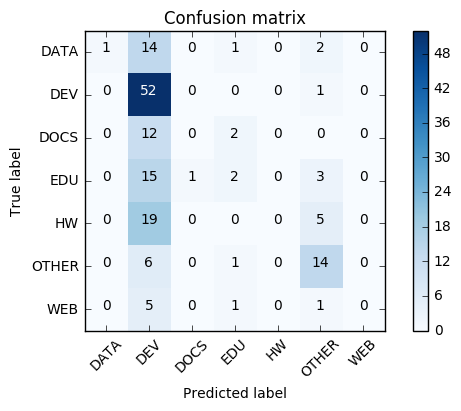

In [42]:
analyze_results(logreg)

## SVM

In [14]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(data_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
analyze_results(svm)

acc train: 0.536082474227
acc test: 0.474683544304


## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(data_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

In [18]:
analyze_results(dtc)

acc train: 0.993127147766
acc test: 0.341772151899


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

In [20]:
analyze_results(rf)

acc train: 0.993127147766
acc test: 0.443037974684


## NN

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(data_train, y_train)

/Users/mbornstein/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [23]:
analyze_results(mlp)

acc train: 0.539518900344
acc test: 0.487341772152


## Two Step Stuff

In [25]:
from TwoStepClassifier import TwoStepClassifier

In [26]:
tsc = TwoStepClassifier(
    sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(data_train, y_train)

0.158075601375
1.0


In [27]:
tsc.score(data_test, y_test)

['' '' '' '' 'DEV' '' '' '' '' 'DEV' '' '' '' 'DEV' 'DEV' '' '' '' '' 'DEV'
 'DEV' '' 'DEV' '' '' '' '' '' '' '' '' 'DEV' '' '' '' 'DEV' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' 'DEV' '' ''
 '' '' '' '' '' '' '' '' '' 'DEV' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' 'DEV' '' 'DEV' '' '' '' '' '' '' 'DEV' '' '' '' '' 'DEV' '' ''
 '' '' '' 'DEV' '' '' '' 'DEV' 'DEV' '' 'DEV' '' '' '' 'DEV' '' '' 'DEV' ''
 '' '' '' '' 'DEV' '' '' '' 'DEV' '' '' '' 'DEV' 'DEV' '' '' '' '' 'DEV' ''
 '' '' '' '' '' '' 'DEV' '' 'DEV']
['EDU' 'DOCS' 'DATA' 'DATA' 'EDU' 'OTHER' 'DOCS' 'HW' 'DOCS' 'WEB' 'OTHER'
 'DOCS' 'DOCS' 'EDU' 'DOCS' 'DOCS' 'HW' 'EDU' 'OTHER' 'WEB' 'WEB' 'EDU'
 'DOCS' 'OTHER' 'OTHER' 'DOCS' 'EDU' 'DOCS' 'OTHER' 'DOCS' 'DOCS' 'DOCS'
 'OTHER' 'WEB' 'DATA' 'EDU' 'DOCS' 'DATA' 'OTHER' 'DOCS' 'DOCS' 'EDU'
 'DOCS' 'OTHER' 'EDU' 'OTHER' 'DOCS' 'DOCS' 'DOCS' 'OTHER' 'OTHER' 'DOCS'
 'HW' 'DOCS' 'DOCS' 'WEB' 'OTHER' 'EDU' 'EDU' 'EDU' 'DATA' 'DOCS' 'DO

0.189873417721519